<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/Create_Clean_User_and_Review_CSV_Version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import numpy as np
from tqdm import tqdm

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Import User Dataset

In [3]:
#import user dataset
df =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_user_version2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,1259,5994,267,2007,3.91
1,5,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,13066,27281,3138,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3.74
2,26,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,1010,1003,52,"2009,2010,2011,2012,2013",3.32
3,35,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,330,299,28,"2009,2010,2011",4.27
4,38,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,15,7,1,NaN,3.54


In [5]:
df = df.iloc[:,1:]

In [6]:
df.shape

(1249206, 11)

In [7]:
df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,1259,5994,267,2007,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,13066,27281,3138,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3.74
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,1010,1003,52,"2009,2010,2011,2012,2013",3.32
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,330,299,28,"2009,2010,2011",4.27
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,15,7,1,NaN,3.54


###Import Reviews and Business Dataset

In [8]:
#import reviews dataset
df_r =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_version2.csv')

In [9]:
df_b =pd.read_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_business_clean_version4.csv')

In [11]:
df_r.shape

(3700356, 5)

In [10]:
df_b.shape

(30930, 43)

In [12]:
# only keep businesses that are categorized as restaurant
df_r = df_r.merge(df_b,left_on='business_id',right_on='business_id')

In [13]:
df_r.head()

,user_id,business_id,date,stars_x,text,Unnamed: 0,Unnamed: 0.1,name,address,city,...,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid
0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,2014-02-05 20:30:30,3.0,Family diner. Had the buffet. Eclectic assortm...,3056,13266,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,...,0,1,0,0,0,0,0,1,0,0
1,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2015-09-10 02:41:13,2.0,Let me start by saying the service is AWESOME!...,3056,13266,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,...,0,1,0,0,0,0,0,1,0,0
2,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,2017-08-18 01:42:46,5.0,Went here for the first time for the dinner bu...,3056,13266,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,...,0,1,0,0,0,0,0,1,0,0
3,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,2015-09-26 16:13:09,5.0,This is my 1st experience here at Kettle. The...,3056,13266,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,...,0,1,0,0,0,0,0,1,0,0
4,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,2015-06-22 16:08:27,3.0,"Located on the west side of Starr Pass Blvd, K...",3056,13266,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,...,0,1,0,0,0,0,0,1,0,0


In [14]:
df_r  = df_r.iloc[: , :5]
df_r = df_r.rename(columns = {'stars_x':'stars'})

In [15]:
df_r.head()

,user_id,business_id,date,stars,text
0,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,2014-02-05 20:30:30,3.0,Family diner. Had the buffet. Eclectic assortm...
1,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2015-09-10 02:41:13,2.0,Let me start by saying the service is AWESOME!...
2,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,2017-08-18 01:42:46,5.0,Went here for the first time for the dinner bu...
3,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,2015-09-26 16:13:09,5.0,This is my 1st experience here at Kettle. The...
4,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,2015-06-22 16:08:27,3.0,"Located on the west side of Starr Pass Blvd, K..."


In [16]:
df_r.shape

(3615420, 5)

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

###Analyze Users giving all 1 star reviews

In [18]:
df.describe()

,review_count,useful,funny,cool,fans,average_stars
count,1.249206e+06,1.249206e+06,1.249206e+06,1.249206e+06,1.249206e+06,1.249206e+06
mean,3.007106e+01,5.628995e+01,2.299898e+01,3.277324e+01,1.965375e+00,3.717665e+00
std,9.790677e+01,7.825248e+02,4.982574e+02,6.899764e+02,2.227070e+01,1.046232e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.170000e+00
50%,8.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.920000e+00
75%,2.200000e+01,1.700000e+01,3.000000e+00,4.000000e+00,0.000000e+00,4.500000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00


In [19]:
# Number of users who gave all 1 star reviews
df2  = df.loc[df['average_stars'] == 1]
df2.shape

(61560, 11)

(0.0, 100.0)

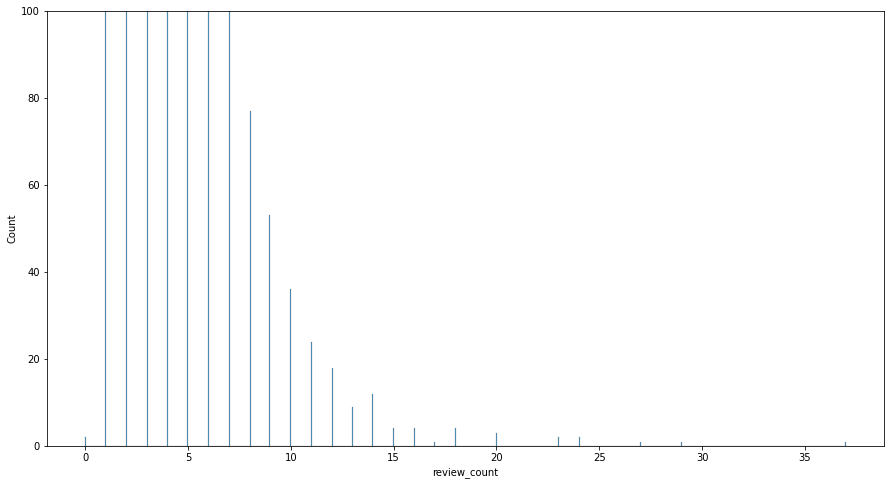

In [20]:
# Distribution of review count of users giving all 1 star reviews
plt.figure(figsize=(15,8))

sns.histplot(data=df2, x="review_count")
plt.ylim(0, 100)

(0.0, 1000.0)

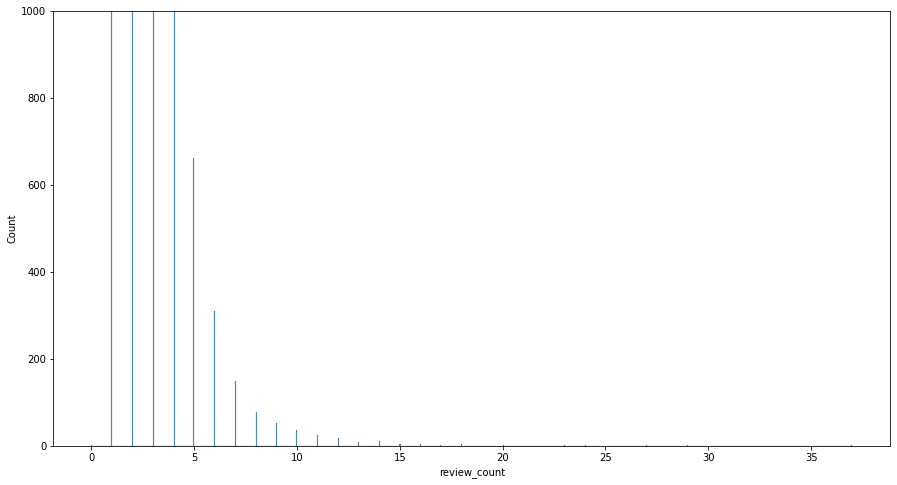

In [27]:
# Distribution of review count of users giving all 1 star reviews
plt.figure(figsize=(15,8))

sns.histplot(data=df2, x="review_count")
plt.ylim(0, 1000)

In [21]:
# Number of users who gave more than one 1 star reviews
df3  = df2.loc[df2['review_count'] > 1]
df3.shape

(18095, 11)

18095 users had 2 or more reviews of all 1 stars

In [22]:
# Number of users who gave more than ten 1 star reviews
df4  = df2.loc[df2['review_count'] > 9]
df4.shape

(122, 11)

122 users had 10 or more reviews of all 1 stars

In [23]:
# Number of users who gave more than 15 1 star reviews
df4  = df2.loc[df2['review_count'] > 14]
df4.shape

(23, 11)

23 users had 15 or more reviews of all 1 stars

In [24]:
# Number of users who gave more than 20 1 star reviews
df5  = df2.loc[df2['review_count'] > 19]
df5.shape

(10, 11)

10 users had 20 or more reviews of all 1 stars

### Analze the users and reviews of users giving more than 15 all 1 star reviews

In [28]:
# number of total reviews from the users giving 15+ all 1 star reviews
Total = df4['review_count'].sum()
print(Total)

460


In [29]:
# list of users who gave more than 15 all 1 star reviews
users = df4['user_id'].tolist()

In [30]:
# reviews of users giving all 1 star reviews
df6 = df_r.loc[df_r['user_id'].isin(users)]
df6.shape

(62, 5)

There are 23 users leaving a combined 460 1 star reviews. However, there are only 62 text reviews.

In [31]:
df6

,user_id,business_id,date,stars,text
45372,HERTMvQu6ronMy4kx3pS_w,FnEkr6LzjuGsg93Z7fkl7Q,2018-03-09 14:18:39,1.0,This place is super unprofessional and its clientele is racing. I had a psycho literally scream at me at the restaurant. I made an announcement as to the rudeness. The supervisor intervened and took me outside and told me not to return and made up a lie about owing the restaurant 78 dollars. He hoarded the restaurant. It is a racist pit hole. As you walk in the black hostess is in the corner and they are all at the bar having a good time. He took the psycho's side in a minute like if I did anything wrong...it is the usual theme despite everything else being allowed in this country. \n\nSad to say another racist pit hole....full of shit and rudeness.
229900,1KRXBGbrzW5pog_NReJn7A,0pL-eq0ufX5jMDgVAvoHHw,2017-06-12 01:01:55,1.0,"These people don't honor their hours, I stopped by at 9:35pm on Sunday , and I was told they actually close at 9:45, even it says 9:00pm on the door. Then I told the guy it's 9:35 on my cell, and he said their clock is hoeing different time, make no sense , WTF"
238215,K41f1lyWGzvkAqSkU4S7CQ,sway6xsRT_CUC6peK_Pyww,2018-12-16 16:39:07,1.0,"What a horrible experience on the roof top bar. Bar service sucks. 35 min to get a drink while the staff run around in circles. Worst efficiency I've ever seen while the managers did nothing. When I if he was the manager is said ""sort of"" After telling him our experience is responded ""OK"". \n\nNever go to this place. It sucks."
256859,G2yoB8gAhLvqn-peUIt9wg,PxEiXqMAzzvp8GFlb5EoLg,2017-09-26 00:35:28,1.0,"I took two guests there for dinner. I ordered the appetizer sampler, which was supposed to be andouille sausage, Cajun shrimp, pimento cheese, fried pickles, fried green tomatoes,and homemade almond crackers. They brought it to the table, and left it without saying a word. It did not have either the cheese or the fried green tomatoes. \n\nWhen I let them know they forgot the cheese and tomatoes, they checked with the kitchen, came back to our table and said that the reason it did not come with the cheese and tomatoes was that the ran out. Period. I asked how you could advertise that it came with these things (for a $19 appetizer,) take our order without mentioning that you don't actually have the things I ordered, or at the very least once the kitchen realizes that they do not have the food come back to our table and ask if we wanted to order something else, or would like to substitute something for the missing items?\n\nThe manager then came over and added more shrimp and sausage to make up for the missing items (the ""homemade almond crackers"" had already been substituted with cut up pieces of plain toast, which they made no mention of.) \n\nI then asked the waiter about their ""Hot Chicken,"" to make sure that I could get it grilled, as I cannot eat fried chicken, to which he said yes you can get it pan seared. Of course they brought me fried chicken! I sent it back, and refused their offer to bring me something else. \n\nThe atmosphere was nice and so were the people, but they tried to rip us off with the appetizer, and made the wrong food. After taking my guests out for dinner - I had to stop and get take out on the way home! Dishonest and incompetent service - never again!"
284656,zb723R2g4erHBoPh8t5I-w,09za1h1fdeF9rTSviTV3zg,2014-07-05 15:04:09,1.0,"This WAS a great place to eat ; the buffet and the regular food was superb, I used to go here with my colleagues from work almost twice a week regularly. \nThe cook apparently changed a few weeks ago and so did the manager, and it has not been the same after.\n I love Indian food and I eat it all the time. I have not visited this place for two months, since the change. Sadly the prices have gone up and the quality and gone down.\n To add insult to injury they have a new blonde manager who barely knows Indian food, but is loud and uncouth in her interactions.\nNothing against her, just that a Indian mana

###Analyze the users who gave all 5 star reviews

In [32]:
# Number of users who gave all 5 star reviews
df2  = df.loc[df['average_stars'] == 5]
df2.shape

(179910, 11)

(0.0, 4000.0)

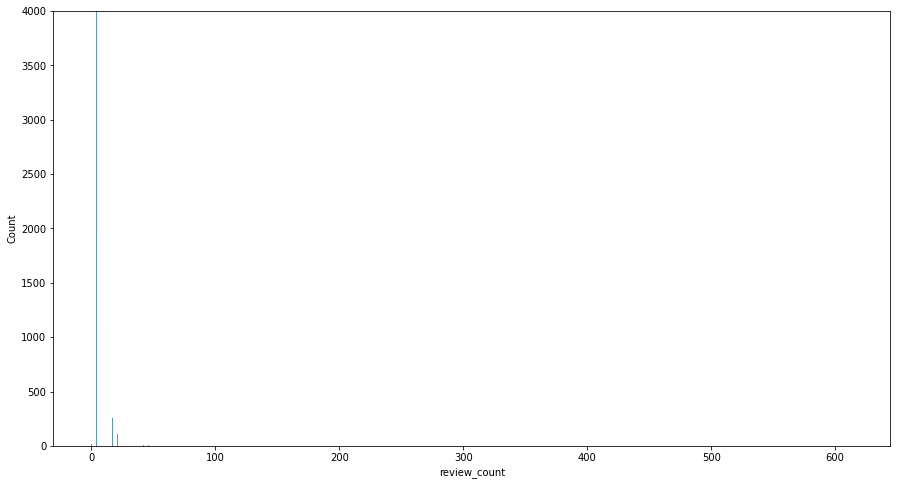

In [33]:
# Distribution of review count of users giving all 5 star reviews
plt.figure(figsize=(15,8))

sns.histplot(data=df2, x="review_count")
plt.ylim(0, 4000)
#plt.xlim(0, 100)

(0.0, 10000.0)

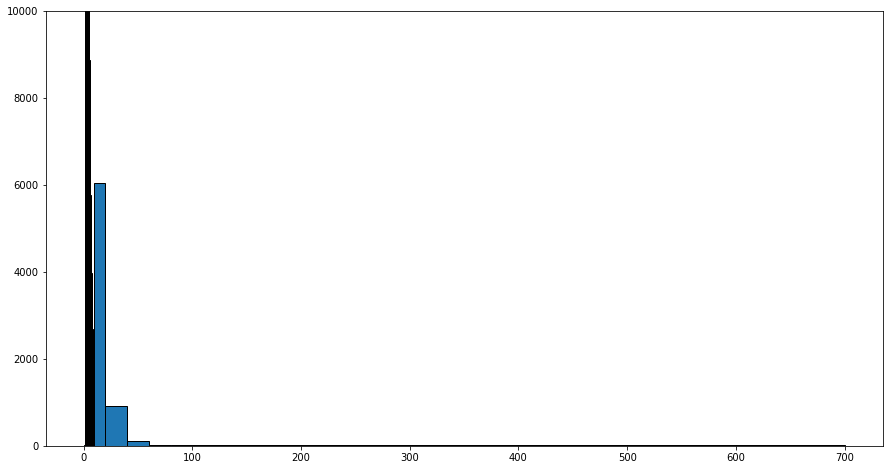

In [34]:
# User distribution by number of 5 star reviews written
plt.figure(figsize=(15,8))

plt.hist(df2['review_count'], edgecolor='black', bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 700])
plt.ylim(0, 10000)

(0.0, 400.0)

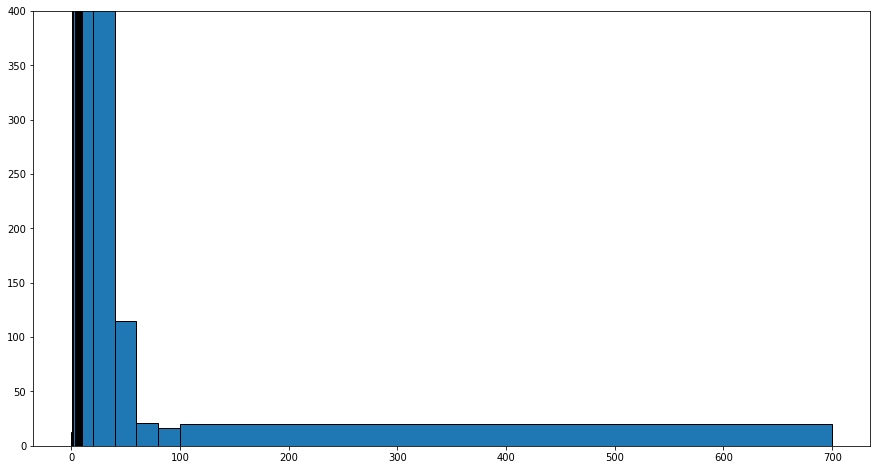

In [35]:
plt.figure(figsize=(15,8))

plt.hist(df2['review_count'], edgecolor='black', bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 40, 60, 80, 100, 700])
plt.ylim(0, 400)

In [36]:
# Number of users who gave more than one 5 star review
df3  = df2.loc[df2['review_count'] > 1]
df3.shape

(109505, 11)

109505 users had 2 or more reviews of all 5 stars

In [37]:
# Number of users who gave more than 20 1 star reviews
df4  = df2.loc[df2['review_count'] > 19]
df4.shape

(1092, 11)

1092 users had 20 or more reviews of all 5 stars

In [38]:
# Number of users who gave more than 40 5 star reviews
df4  = df2.loc[df2['review_count'] > 39]
df4.shape

(172, 11)

172 users had 40 or more reviews of all 5 stars

In [39]:
# Number of users who gave more than 60 1 star reviews
df5  = df2.loc[df2['review_count'] > 59]
df5.shape

(57, 11)

57 users had 60 or more reviews of all 5 stars

###Analyze the users and reviews of users giving more than 60 all 5 star reviews

In [40]:
# number of total reviews from the users giving 50+ all 5 star reviews
Total = df5['review_count'].sum()
print(Total)

6884


In [41]:
# list of users who gave more than 60 all 5 star reviews
users2 = df5['user_id'].tolist()

In [42]:
# reviews of users giving all 5 star reviews
df6 = df_r.loc[df_r['user_id'].isin(users2)]
df6.shape

(579, 5)

There are 57 users leaving a combined 6884 5 star reviews. However, there are only 579 text reviews.

In [43]:
df6

,user_id,business_id,date,stars,text
2346,66O_GC84is9cBFfikMxwBg,otQS34_MymijPTdNBoBdCw,2021-01-26 02:31:56,5.0,One of the better mexican food restaurants in tucson\nChoice of tacos is fantastic and micheladas make them better\n\nThe taco bar is great\nToppings to go on my Sonoran Dog
16651,n7L3C8zSAjLxLTXv452OgA,SZU9c8V2GuREDN5KgyHFJw,2017-08-24 00:08:46,5.0,"If you want fresh seafood , and I mean FRESH- check this place out! Located at the end of the pier in Santa Barbara, CA, this casual seafood restaurant will give you a great experience. They literally have tanks with crabs , sea urchins , etc... just be sure to get here early!"
25490,vOssX3-YwoP4DgdL7uFEHA,f4PA-f1tcN1bIpZJLdFsQQ,2018-11-09 15:49:29,5.0,"The University of Chicago Alumni group gathered for a delightful buffet lunch following our museum visit. The dish selection was varied and plentiful and the taste, absolutely spicy and delicious. Wish my appetite was bigger so I could partake of all the choices."
31890,P2S3xft5ePGRLdCeXppFXQ,GBTPC53ZrG1ZBY3DT8Mbcw,2016-03-26 07:33:06,5.0,"I would say it's very fancy looking place for southern food but I was like I am gonna go in anyways. I ordered the Shrimp and Grits. It's Louisiana's shrimp, eggs, andouille sausage and jalapeno cheese grits. I hella loved it. It was cooked like a sauce and all mixed together perfectly on top of a very very very bomb jalapeno cheese grits. The grits I would say was the highlight. This girl loves grits and with jalapeno even more amazing. I would definitely come back again."
36279,n7L3C8zSAjLxLTXv452OgA,pym7c6ZFEtmoH16xN2ApBg,2016-12-23 01:31:59,5.0,"We were stopping in New Orleans for the night and just wanted to try the famous food of the city. If I was more of a writer I would write a novel about this place. Bottom line, the food here is amazing New Orleans food with so much flavor."
41520,IGJkQ4R9JIjwEThZlQfOSw,F3n0sB5Dqn-N2fAA5TgmFQ,2020-04-04 16:18:24,5.0,We get take out from them all the time. Food is always delicious and the owner is a very sweet lady. Favorite dish is honey walnut shrimp.
42217,7NHf3QgyGlZ_9pwdWLFdhA,mLNSOU8Ki0Fm09xd6ZKkcA,2018-01-07 07:24:52,5.0,"This is a wonderful, classy Italian restaurant that I've had the pleasure of stopping by for a few years when I want Italian food that's not the usual Carrabbas that I go to.. The interior is clean and classy in appearance, complete with beautiful white table cloth that makes me feel even fancier when I come here. The food is just as good and is and isn't your typical Italian. Most notable would be the scallops and polenta with lobster sauce, their blt salad (not photographed) and the basil pesto chicken fettuccine that I had on my most recent visit. I've also had their classic lasagna which is pretty good, and uses béchamel sauce in it. The staff is very kind and accommodating. I showed up 30 minutes before dinner hour, yet they were willing to let me order off the dinner menu. I ordered their watercress salad to start off my meal. It was very light and refreshing from the slices of granny smith apple, and the blue cheese and pecans added more layers of flavor and texture. The basil pesto fettuccine pasta came next. This dish had a very buttery flavor to it and went well with the grilled chicken and mushrooms mixed in. As beautiful as the interior is, I enjoyed eating my meal outside which is just as classy and well polished in appearance. It was a perfect spot to people watch and enjoy the beautiful day. I would definitely have to try the brunch next time though."
46701,7NHf3QgyGlZ_9pwdWLFdhA,Mha77MN_BYGB-w7DONZ5YA,2020-07-11 22:46:35,5.0,"I ordered from here through Doordash on a hot afternoon when i really didn't want to go anywhere or do anything. Being that I lost my sense of taste and smell, my options were fairly limited, but I knew I had to eat something. I was feeling like something light along with something starchy, so I thought this was a good choice. I went with their chicken salad due to my coworker havi

####Remove the 62 reviews and 23 users giving only 1 star reviews and more than 15 1 star reviews. Remove the 579 reviews and 57 users giving only 5 star reviews and more than 60 1 star reviews. 

In [44]:
# remove 1 star user outliers
df_u = df.loc[~df['user_id'].isin(users)]

In [45]:
# remove 5 star user outliers
df_u = df_u.loc[~df_u['user_id'].isin(users2)]

In [46]:
df_u.shape

(1249126, 11)

In [47]:
df_u.to_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_user_clean_version4.csv', index = False)

In [48]:
# remove 1 star review outliers
df_r = df_r.loc[~df_r['user_id'].isin(users)]

In [49]:
# remove 5 star review outliers
df_r = df_r.loc[~df_r['user_id'].isin(users2)]

In [50]:
df_r.shape

(3614779, 5)

In [51]:
df_r.to_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_clean_version4.csv', index = False)

Reviews for St. Louis Market

In [60]:
# only keep businesses in St. Louis
df_b_st_louis = df_b[df_b['market'].str.contains('St. Louis', case=False, na=False)]

In [61]:
# only keep businesses that are categorized as restaurant
df_r_st_louis = df_r.merge(df_b_st_louis,left_on='business_id',right_on='business_id')

In [62]:
df_r_st_louis.shape

(292376, 47)

In [63]:
df_r_st_louis  = df_r_st_louis.iloc[: , :5]
df_r_st_louis = df_r_st_louis.rename(columns = {'stars_x':'stars'})

In [64]:
df_r_st_louis.head()

,user_id,business_id,date,stars,text
0,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,2014-06-27 22:44:01,4.0,Love going here for happy hour or dinner! Great patio with fans to beat the StL heat! Also...very accomodating at this location. I like the Veal Milanese but with mixed greens instead of pasta! they'll modify the menu to suit your taste!
1,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,2014-08-24 19:24:26,5.0,"My friends at work (connoisseurs of good food in the St. Louis area) introduced me to yet another very nice restaurant and that's Brio's!! I like everything about it - starting from the complimentary bread and chips to the bruschetta, pasta and salads !! Beautiful place.. The service adds to the charm !!"
2,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,2015-09-24 15:01:11,4.0,"Great service, relaxing atmosphere and the food was exceptional. Sit outside at a high top, you'll quickly forget you in St.Louis."
3,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,2015-10-17 04:56:25,5.0,"I went to Brio for the first time on Wednesday for dinner with my friend since a friend of us recommended it. Our first impression was ""Wow, this is a very nice restaurant."" The restaurant is absolutely beautiful. The servers are professional and very attentive. I treated myself an order of single Tuscan Grilled Porkchop with Roasted Garden Vegetables while my friend went straight for the Shrimp Mediterranean. My porkchop was incredibly moist and tender. There was a thin layer of crunchy fat wrapping about the piece of meat, which actually gave it more flavor and texture. The portion was reasonable so that I did not feel like I was stuffing myself but actually celebrated the food. We, however, did not have the chance to try out their dessert collection. I personally do not think this was a bad thing since it would give us an excuse to come back here for another time and enjoy the food."
4,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,2016-01-04 16:56:32,4.0,"I usually steer clear of the chain restaurants (since there are so many other good restaurants here in STL), but eating at Brio was a good choice. I've had brunch, lunch, and dinner here and all were fantastic. It was also pretty easy to get last minute reservations. The mushroom ravioli was delicious...I'd definitely get it again!"


In [65]:
df_r_st_louis.shape

(292376, 5)

In [66]:
df_r_st_louis.to_csv('/content/gdrive/MyDrive/yelp_dataset/yelp_reviews_clean_version4_st_louis.csv', index = False)